# Tableaux de bord

Ce notebook propose des visualisations avancées et des indicateurs de performance pour le projet BI.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

faits_matieres = pd.read_csv('../dataset/generated/faits_matieres.csv')

plt.figure(figsize=(12,6))
sns.barplot(data=faits_matieres, x='type_matiere', y='volume_tonnes', estimator=sum)
plt.xticks(rotation=45)
plt.title('Volume total par type de matière')
plt.tight_layout()
plt.show()

In [ ]:
# KPI : Volume total par producteur
total_volume_producteur = faits_matieres.groupby('producteur')['volume_tonnes'].sum().sort_values(ascending=False)
print("Volume total par producteur :")
print(total_volume_producteur)

plt.figure(figsize=(10,5))
sns.barplot(x=total_volume_producteur.index, y=total_volume_producteur.values)
plt.xticks(rotation=45)
plt.title('Volume total par producteur')
plt.tight_layout()
plt.show()

# KPI : Volume total par période
total_volume_periode = faits_matieres.groupby('periode')['volume_tonnes'].sum().sort_values(ascending=False)
print("Volume total par période :")
print(total_volume_periode)

plt.figure(figsize=(8,4))
sns.barplot(x=total_volume_periode.index, y=total_volume_periode.values)
plt.title('Volume total par période')
plt.tight_layout()
plt.show()

# KPI : Top 5 types de matières par volume
top5_matieres = faits_matieres.groupby('type_matiere')['volume_tonnes'].sum().sort_values(ascending=False).head(5)
print("Top 5 types de matières par volume :")
print(top5_matieres)

plt.figure(figsize=(8,4))
sns.barplot(x=top5_matieres.index, y=top5_matieres.values)
plt.title('Top 5 types de matières par volume')
plt.tight_layout()
plt.show()

# Heatmap : Volume par type de matière et producteur
pivot = faits_matieres.pivot_table(index='type_matiere', columns='producteur', values='volume_tonnes', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Volume par type de matière et producteur')
plt.tight_layout()
plt.show()

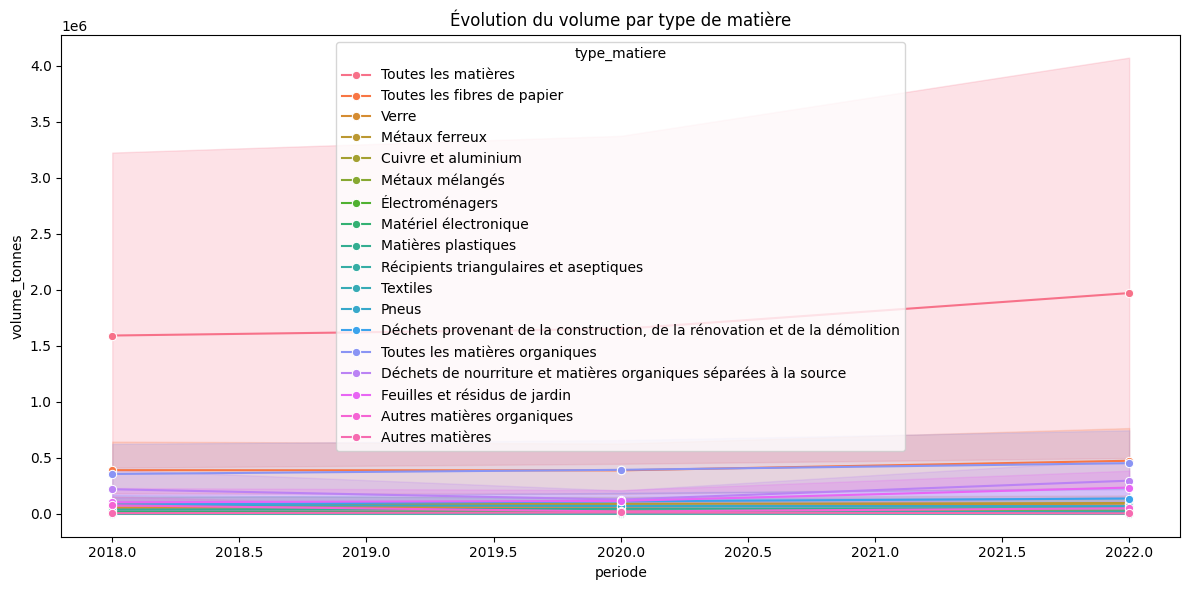

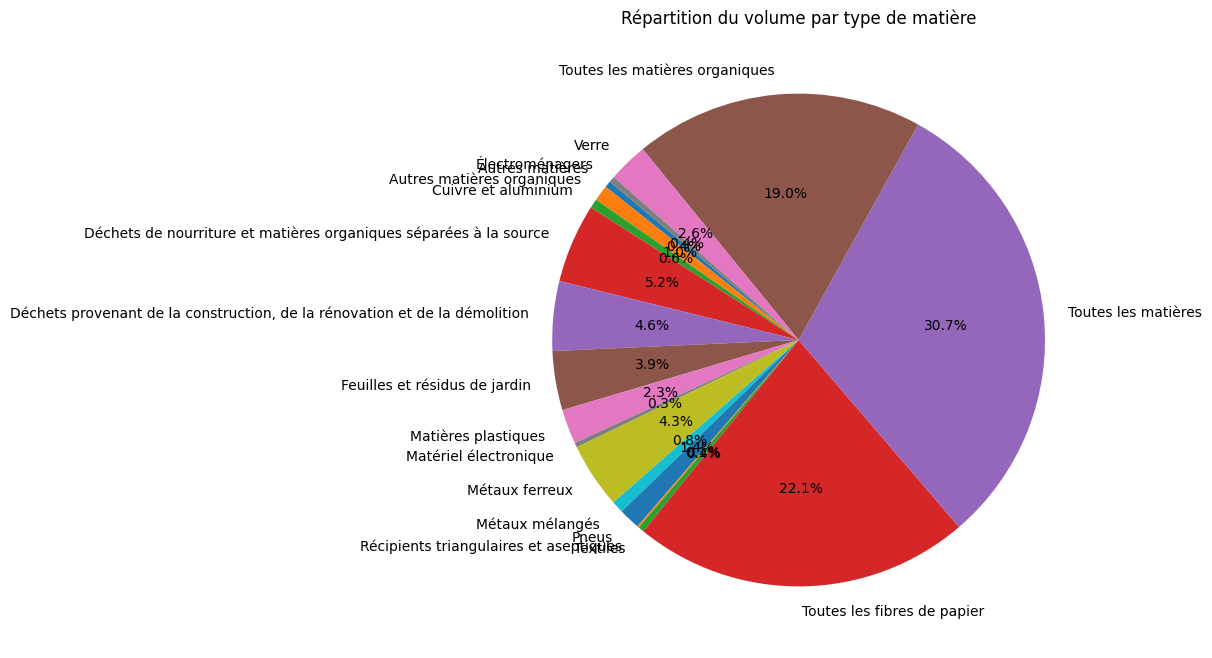

Volume moyen par producteur:
producteur
Toutes les sources des matières récupérées            240243.619137
Sources des matières résidentielles récupérées        103620.557143
Sources des matières non résidentielles récupérées     77103.140401
Name: volume_tonnes, dtype: float64
Volume moyen par type de matière:
type_matiere
Toutes les matières                                                           1.723961e+06
Toutes les fibres de papier                                                   4.150802e+05
Toutes les matières organiques                                                3.985030e+05
Déchets de nourriture et matières organiques séparées à la source             2.156078e+05
Feuilles et résidus de jardin                                                 1.647095e+05
Déchets provenant de la construction, de la rénovation et de la démolition    1.077002e+05
Métaux ferreux                                                                9.110158e+04
Pneus                               

/tmp/ipykernel_157053/1068566182.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3 = top_producteurs_par_matiere.groupby('type_matiere').apply(lambda x: x.nlargest(3, 'volume_tonnes')).reset_index(drop=True)
/tmp/ipykernel_157053/1068566182.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


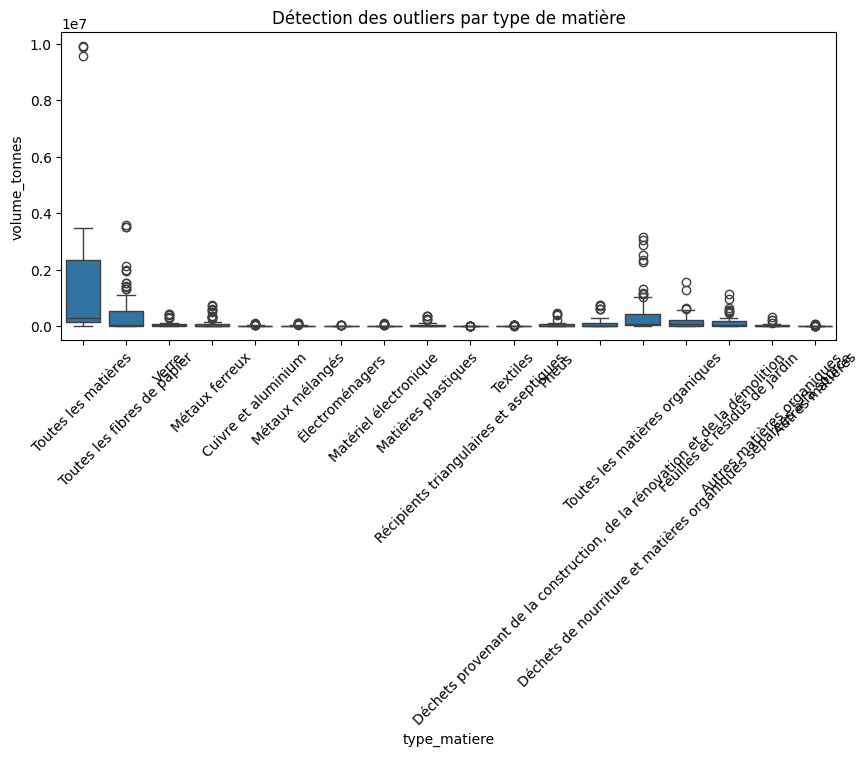

Aperçu interactif des faits:


,periode,geo,type_matiere,producteur,volume_tonnes
0,2018,Canada,Toutes les matières,Toutes les sources des matières récupérées,9551229.0
1,2018,Canada,Toutes les matières,Sources des matières résidentielles récupérées,NaN
2,2018,Canada,Toutes les matières,Sources des matières non résidentielles récupé...,NaN
3,2018,Canada,Toutes les fibres de papier,Toutes les sources des matières récupérées,3519689.0
4,2018,Canada,Toutes les fibres de papier,Sources des matières résidentielles récupérées,1537059.0
5,2018,Canada,Toutes les fibres de papier,Sources des matières non résidentielles récupé...,1982630.0
6,2018,Canada,Verre,Toutes les sources des matières récupérées,396931.0
7,2018,Canada,Verre,Sources des matières résidentielles récupérées,298052.0
8,2018,Canada,Verre,Sources des matières non résidentielles récupé...,98879.0
9,2018,Canada,Métaux ferreux,Toutes les sources des matières récupérées,624866.0


In [6]:
# Évolution du volume par type de matière au fil des années
plt.figure(figsize=(12,6))
sns.lineplot(data=faits_matieres, x='periode', y='volume_tonnes', hue='type_matiere', marker='o')
plt.title('Évolution du volume par type de matière')
plt.tight_layout()
plt.show()

# Répartition (%) par type de matière (pie chart)
volumes = faits_matieres.groupby('type_matiere')['volume_tonnes'].sum()
plt.figure(figsize=(8,8))
plt.pie(volumes, labels=volumes.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition du volume par type de matière')
plt.show()

# Volume moyen par producteur et par type de matière
mean_volume_producteur = faits_matieres.groupby('producteur')['volume_tonnes'].mean().sort_values(ascending=False)
mean_volume_matiere = faits_matieres.groupby('type_matiere')['volume_tonnes'].mean().sort_values(ascending=False)
print('Volume moyen par producteur:')
print(mean_volume_producteur)
print('Volume moyen par type de matière:')
print(mean_volume_matiere)

# Top 3 producteurs par type de matière
top_producteurs_par_matiere = faits_matieres.groupby(['type_matiere', 'producteur'])['volume_tonnes'].sum().reset_index()
top3 = top_producteurs_par_matiere.groupby('type_matiere').apply(lambda x: x.nlargest(3, 'volume_tonnes')).reset_index(drop=True)
print('Top 3 producteurs par type de matière:')
print(top3)

# Analyse des valeurs manquantes et outliers
print('Valeurs manquantes par colonne:')
print(faits_matieres.isnull().sum())
plt.figure(figsize=(10,4))
sns.boxplot(data=faits_matieres, x='type_matiere', y='volume_tonnes')
plt.xticks(rotation=45)
plt.title('Détection des outliers par type de matière')
plt.tight_layout()
plt.show()

# Tableau interactif (si Jupyter/IPython)
from IPython.display import display
print('Aperçu interactif des faits:')
display(faits_matieres.head(20))